# Explorative Data Analysis
For Visualization of the Dataset and some initial transfromation neccessary

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_folder = Path.cwd()
parent_folder = current_folder.parent
sys.path.insert(0, str(parent_folder))
print(parent_folder)

import plotly.io as pio
pio.renderers.keys()
pio.renderers.default = 'notebook' 

import pandas as pd
import numpy as np
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import glob
import os
import seaborn as sns

from utils.clean_numerical import *

/Users/kevinb/Desktop/dsc80/Chatable-Study-Database


# Loading Data & Cleaning Them

In [2]:
current_folder = Path.cwd()
parent_folder = current_folder.parent
os.chdir(parent_folder)
print(parent_folder)

# study time
# fall_2022 = pd.read_csv('data/2022_fall_study.csv')
# winter_2023 = pd.read_csv('data/2023_winter_study.csv')
# spring_2023 = pd.read_csv('data/2023_spring_study.csv')
# summer_2023 = pd.read_csv('data/2023_summer_study.csv')
# fall_2023 = pd.read_csv('data/2023_fall_study.csv')
# winter_2024 = pd.read_csv('data/2024_winter_study.csv')
# spring_2024 = pd.read_csv('data/2024_spring_study.csv')
# summer_2024 = pd.read_csv('data/2024_summer_study.csv')
# fall_2024 = pd.read_csv('data/2024_fall_study.csv')
# winter_2025 = pd.read_csv('data/2025_winter_study.csv')
# spring_2025 = pd.read_csv('data/2025_spring_study.csv')
# study = pd.concat([fall_2022, winter_2023, spring_2023, summer_2023, fall_2023, winter_2024, spring_2024, summer_2024, fall_2024, winter_2025, spring_2025], axis=0)

data_dir = 'data'
file_pattern = os.path.join(data_dir, '*_study.csv')
csv_files = glob.glob(file_pattern)
csv_files.sort()
df_list = [pd.read_csv(file) for file in csv_files]
study = pd.concat(df_list, axis=0, ignore_index=True)
print(f"Total records: {study.shape[0]}")

/Users/kevinb/Desktop/dsc80/Chatable-Study-Database
Total records: 887


In [3]:
study.describe()

total  math18review  math18matlab    math18hw  dsc10review  \
count   887.000000     75.000000     75.000000   75.000000    75.000000   
mean    500.845547     39.400000      5.933333    9.826667    26.240000   
std     231.059855     59.421081     23.092840   24.670462    44.750612   
min       0.000000      0.000000      0.000000    0.000000     0.000000   
25%     312.500000      0.000000      0.000000    0.000000     0.000000   
50%     530.000000     15.000000      0.000000    0.000000     0.000000   
75%     690.000000     52.500000      0.000000    0.000000    30.000000   
max    1020.000000    310.000000    150.000000  120.000000   182.000000   

          dsc10hw  math20breview   math20bhw        doc1       cogs9  ...  \
count   75.000000      75.000000   75.000000   75.000000   75.000000  ...   
mean    27.053333      16.026667   19.786667   11.266667   20.080000  ...   
std     46.930050      38.039444   36.975994   27.731012   34.775247  ...   
min      0.000000       0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000       0.000000    0.000000    0.000000    0.000000  ...   
50%      0.000000       0.000000    0.000000    0.000000    0.000000  ...   
75%     46.000000      23.000000   20.000000    0.000000   30.000000  ...   
max    185.000000     248.000000  146.000000  127.000000  155.000000  ...   

       rplh_winter25  mpi_winter25   math190a     math189  cse257_winter25  \
count      74.000000     74.000000  74.000000   74.000000        74.000000   
mean        4.324324     50.675676  17.418919   46.689189        10.135135   
std        18.437683     76.132204  29.761153   64.713685        33.041827   
min         0.000000      0.000000   0.000000    0.000000         0.000000   
25%         0.000000      0.000000   0.000000    0.000000         0.000000   
50%         0.000000      0.000000   0.000000    0.000000         0.000000   
75%         0.000000     90.000000  30.000000   90.000000         0.000000   
max        90.000000    280.000000  90.000000  220.000000       180.000000   

          cse251b      cse234     cogs164    cogs101a  pp_winter25  
count   74.000000   74.000000   74.000000   74.000000    74.000000  
mean   155.540541   14.864865   65.608108   36.824324   104.054054  
std    144.787439   31.945726   82.303950   48.741521   132.354018  
min      0.000000    0.000000    0.000000    0.000000     0.000000  
25%     60.000000    0.000000    0.000000    0.000000     0.000000  
50%    120.000000    0.000000   37.500000   20.000000    60.000000  
75%    240.000000    0.000000  117.500000   60.000000   161.250000  
max    620.000000  135.000000  310.000000  250.000000   700.000000  

[8 rows x 113 columns]

In [4]:
clean_study = study.pipe(transform_study)
clean_study.head()

/Users/kevinb/Desktop/dsc80/Chatable-Study-Database/utils/clean_numerical.py:134: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



date     total      doc1     cogs9  pp_fall22   exam  week  \
0 2022-10-21  1.800000  0.000000  0.000000   0.000000  0.525   0.0   
1 2022-10-22  4.550000  0.000000  0.000000   0.000000  0.000   0.0   
2 2022-10-23  2.375000  0.208333  0.000000   0.000000  0.000   0.0   
3 2022-10-24  2.450000  0.250000  0.158333   0.000000  0.000   0.0   
4 2022-10-25  3.691667  0.100000  0.000000   0.483333  0.000   0.0   

   training_fall23  ex_phys  fmp_fall23  ...  math189  cse257_winter25  \
0              0.0      0.0         0.0  ...      0.0              0.0   
1              0.0      0.0         0.0  ...      0.0              0.0   
2              0.0      0.0         0.0  ...      0.0              0.0   
3              0.0      0.0         0.0  ...      0.0              0.0   
4              0.0      0.0         0.0  ...      0.0              0.0   

   cse251b  cse234  cogs164  cogs101a  pp_winter25    math18  dsc10   math20b  
0      0.0     0.0      0.0       0.0          0.0  1.025000  0.225  0.208333  
1      0.0     0.0      0.0       0.0          0.0  0.608333  1.700  1.125000  
2      0.0     0.0      0.0       0.0          0.0  0.612500  0.875  0.558333  
3      0.0     0.0      0.0       0.0          0.0  1.475000  0.250  0.191667  
4      0.0     0.0      0.0       0.0          0.0  1.125000  0.750  1.216667  

[5 rows x 110 columns]

In [5]:
df = clean_study.drop(columns=['total','exam','week'])

# selecting 77 entries from the start of non-zero values for each column
relevant_data = pd.DataFrame(index=range(77))

for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:  # Only apply to numeric columns
        start_index = df[column].ne(0).idxmax()  # Find first non-zero index
        # Check if there are at least 77 entries to slice, if not, adjust the range
        end_index = min(start_index + 77, len(df))
        relevant_data[column] = df[column][start_index:end_index].reset_index(drop=True)

# median, mean, max, min, and standard deviation
statistics = {}
for column in relevant_data.columns:
    if relevant_data[column].dtype in [np.float64, np.int64]:  # Apply only to numeric columns
        statistics[column] = {
            'Mean': relevant_data[column].mean(),
            'Max': relevant_data[column].max(),
            'Standard Deviation': relevant_data[column].std()
        }

stats_df = pd.DataFrame(statistics).T
stats_df = stats_df.sort_index()
stats_df.head()

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/1312286284.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/1312286284.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/1312286284.py:11: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

Mean       Max  Standard Deviation
bild1     0.278355  1.833333            0.398958
bild22    0.249567  3.000000            0.580740
chem11    0.780303  8.500000            1.364755
cogs101a  0.589827  4.166667            0.805088
cogs107a  0.272727  2.500000            0.542701

In [6]:
clean_study

date      total      doc1     cogs9  pp_fall22   exam  week  \
0   2022-10-21   1.800000  0.000000  0.000000   0.000000  0.525   0.0   
1   2022-10-22   4.550000  0.000000  0.000000   0.000000  0.000   0.0   
2   2022-10-23   2.375000  0.208333  0.000000   0.000000  0.000   0.0   
3   2022-10-24   2.450000  0.250000  0.158333   0.000000  0.000   0.0   
4   2022-10-25   3.691667  0.100000  0.000000   0.483333  0.000   0.0   
..         ...        ...       ...       ...        ...    ...   ...   
852 2025-08-25  13.500000  0.000000  0.000000   0.000000  0.000   9.0   
853 2025-08-26  13.000000  0.000000  0.000000   0.000000  0.000   9.0   
854 2025-08-27  12.666667  0.000000  0.000000   0.000000  0.000   9.0   
855 2025-08-28  11.250000  0.000000  0.000000   0.000000  0.000   9.0   
856 2025-08-29  17.000000  0.000000  0.000000   0.000000  0.000   9.0   

     training_fall23  ex_phys  fmp_fall23  ...  math189  cse257_winter25  \
0                0.0      0.0         0.0  ...      0.0              0.0   
1                0.0      0.0         0.0  ...      0.0              0.0   
2                0.0      0.0         0.0  ...      0.0              0.0   
3                0.0      0.0         0.0  ...      0.0              0.0   
4                0.0      0.0         0.0  ...      0.0              0.0   
..               ...      ...         ...  ...      ...              ...   
852              0.0      0.0         0.0  ...      0.0              0.0   
853              0.0      0.0         0.0  ...      0.0              0.0   
854              0.0      0.0         0.0  ...      0.0              0.0   
855              0.0      0.0         0.0  ...      0.0              0.0   
856              0.0      0.0         0.0  ...      0.0              0.0   

     cse251b  cse234  cogs164  cogs101a  pp_winter25    math18  dsc10  \
0        0.0     0.0      0.0       0.0          0.0  1.025000  0.225   
1        0.0     0.0      0.0       0.0          0.0  0.608333  1.700   
2        0.0     0.0      0.0       0.0          0.0  0.612500  0.875   
3        0.0     0.0      0.0       0.0          0.0  1.475000  0.250   
4        0.0     0.0      0.0       0.0          0.0  1.125000  0.750   
..       ...     ...      ...       ...          ...       ...    ...   
852      0.0     0.0      0.0       0.0          0.0  0.000000  0.000   
853      0.0     0.0      0.0       0.0          0.0  0.000000  0.000   
854      0.0     0.0      0.0       0.0          0.0  0.000000  0.000   
855      0.0     0.0      0.0       0.0          0.0  0.000000  0.000   
856      0.0     0.0      0.0       0.0          0.0  0.000000  0.000   

      math20b  
0    0.208333  
1    1.125000  
2    0.558333  
3    0.191667  
4    1.216667  
..        ...  
852  0.000000  
853  0.000000  
854  0.000000  
855  0.000000  
856  0.000000  

[857 rows x 110 columns]

# General EDA & Plotting Trends

In [7]:
# Map colors to the statistics DataFrame
stats_df['Color'] = [GROUP_COLOR_MAP.get(COL_GROUP.get(col), 'gray') for col in stats_df.index]
stats_df = stats_df.reset_index()

In [8]:
stats_df.head()

index      Mean       Max  Standard Deviation   Color
0     bild1  0.278355  1.833333            0.398958  purple
1    bild22  0.249567  3.000000            0.580740  purple
2    chem11  0.780303  8.500000            1.364755  yellow
3  cogs101a  0.589827  4.166667            0.805088  purple
4  cogs107a  0.272727  2.500000            0.542701  purple

*Currently we need to manually add colors in `utils.clean_numerical.py` first for labeling data to different categories.

In [9]:
# Sort by Color
stats_df.sort_values(by=['Color', 'index'], inplace=True, ascending=False)

fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=("Maximum Study Time Per Day","Mean Study Time Per Day","Standard Deviation Study Time Per Day"),
    vertical_spacing=0.02  # Adjust spacing to your preference
)

unique_colors = stats_df['Color'].unique()
color_labels = {color: group for group, color in GROUP_COLOR_MAP.items()}

# Plotting each statistic with a trace for each color
for i, stat in enumerate(['Max', 'Mean', 'Standard Deviation']):
    for color in unique_colors:
        filtered_df = stats_df[stats_df['Color'] == color]
        fig.add_trace(
            go.Bar(
                x=filtered_df[stat],
                y=filtered_df['index'],
                orientation='h',
                marker_color=color,
                name=color_labels[color],
                showlegend=(i == 0)  # Show legend only in the first subplot to avoid duplicates
            ),
            row=i+1, col=1
        )

# Update layout for clear visualization
fig.update_layout(height=5000, width=1000, showlegend=True, title_text="Statistical Measures For Each Class's Study Time")
fig.update_xaxes(showgrid=True)
fig.show()

In [10]:
fig = px.violin(clean_study, y='total', title='Total Study Time Distribution')
fig.update_layout(showlegend=True, xaxis_title='Distributionr', yaxis_title='Totao Study Time Per Day')
fig.update_xaxes(showgrid=True)
fig.show()

# Temporal Pattern Analysis

In [11]:
import calendar

clean_study['year'] = clean_study['date'].dt.year
clean_study['season'] = clean_study['date'].dt.quarter
clean_study['month'] = clean_study['date'].dt.month
clean_study['weekday'] = clean_study['date'].dt.weekday
clean_study['week_number'] =  clean_study['date'].dt.isocalendar().week


/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/3557398971.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/3557398971.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/3557398971.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

## Trends in Years

In [41]:
fig = px.scatter(clean_study, x='date',y='total',trendline='lowess')
fig.update_layout(showlegend=True, title_text="Total Study Time Progression", xaxis_title='date', yaxis_title='Totao Study Time Per Day')
fig.update_xaxes(showgrid=True)
fig.show()
# fig.write_html("study_time.html", include_plotlyjs="cdn")

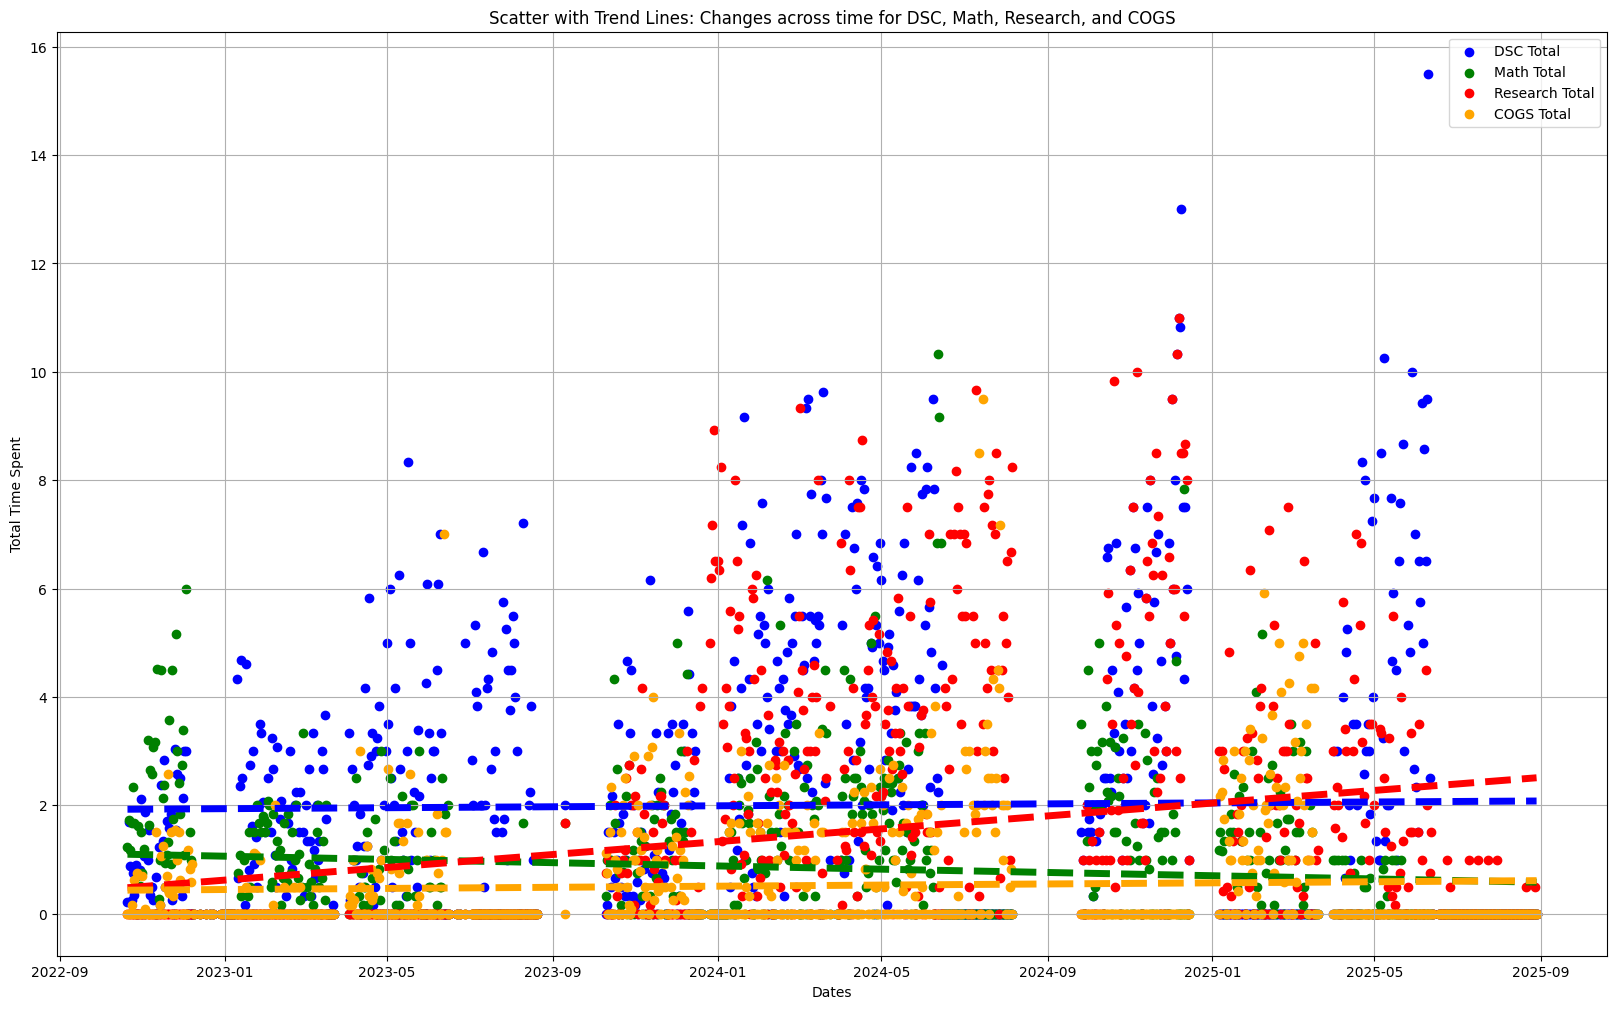

In [13]:
import matplotlib.pyplot as plt

df = clean_study
dsc_cols = [col for col in df.columns if 'ds' in col]
math_cols = [col for col in df.columns if 'math' in col]
research_cols = [col for col in df.columns if ('salk' in col) |
                 ('cse150b' in col) | ('fmp' in col) | ('cl' in col) | ('cse257' in col) | 
                 ('dsc190' in col) | ('sof' in col) | ('track-mjx' in col)]
cogs_cols = [col for col in df.columns if 'cogs' in col]

df['dsc_total'] = df[dsc_cols].sum(axis=1)
df['math_total'] = df[math_cols].sum(axis=1)
df['salk_total'] = df[research_cols].sum(axis=1)
df['cogs_total'] = df[cogs_cols].sum(axis=1)

plt.figure(figsize=(20, 12))

# Scatter plots
plt.scatter(df['date'], df['dsc_total'], label='DSC Total', color='blue')
plt.scatter(df['date'], df['math_total'], label='Math Total', color='green')
plt.scatter(df['date'], df['salk_total'], label='Research Total', color='red')
plt.scatter(df['date'], df['cogs_total'], label='COGS Total', color='orange')  # New scatter plot for COGS

# Trend lines (linear regression)
df['date_num'] = pd.to_numeric(pd.to_datetime(df['date']))

# DSC trend line
z_dsc = np.polyfit(df['date_num'], df['dsc_total'], 1)
p_dsc = np.poly1d(z_dsc)
plt.plot(df['date'], p_dsc(df['date_num']), color='blue', linestyle='dashed', linewidth=5)  # Thicker line

# Math trend line
z_math = np.polyfit(df['date_num'], df['math_total'], 1)
p_math = np.poly1d(z_math)
plt.plot(df['date'], p_math(df['date_num']), color='green', linestyle='dashed', linewidth=5)

# Research trend line
z_salk = np.polyfit(df['date_num'], df['salk_total'], 1)
p_salk = np.poly1d(z_salk)
plt.plot(df['date'], p_salk(df['date_num']), color='red', linestyle='dashed', linewidth=5)

# COGS trend line
z_cogs = np.polyfit(df['date_num'], df['cogs_total'], 1)
p_cogs = np.poly1d(z_cogs)
plt.plot(df['date'], p_cogs(df['date_num']), color='orange', linestyle='dashed', linewidth=5)

plt.xlabel('Dates')
plt.ylabel('Total Time Spent')
plt.title('Scatter with Trend Lines: Changes across time for DSC, Math, Research, and COGS')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
grouped = clean_study.assign(week_of_year = clean_study['date'].dt.weekofyear)
group_by_week = grouped.groupby('week_of_year').max().reset_index()
fig = px.scatter(group_by_week, x='week_of_year',y='total',trendline='lowess')
fig.update_layout(showlegend=True, title_text="'Max of Single Day Study Time Over Time'", xaxis_title='Week of Year', yaxis_title='Totao Study Time Per Day')
fig.update_xaxes(showgrid=True)
fig.show()

/var/folders/yt/5gdjwln55x9_stgx851x0yb80000gn/T/ipykernel_16984/2811050891.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



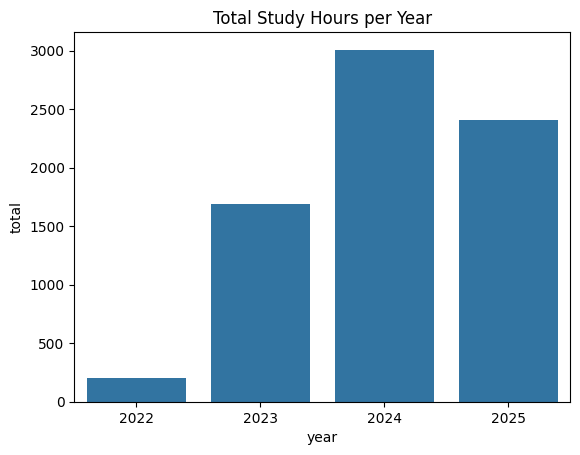

In [15]:
yearly_total = clean_study.groupby('year')['total'].sum().reset_index()
sns.barplot(data=yearly_total, x='year', y='total')
plt.title('Total Study Hours per Year')
plt.show()

## Trends in Seasons

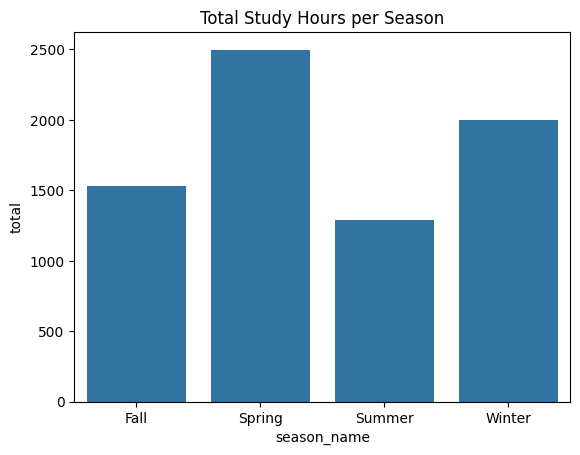

In [16]:
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
clean_study['season_name'] = clean_study['season'].map(seasons)
seasonal_total = clean_study.groupby('season_name')['total'].sum().reset_index()
sns.barplot(data=seasonal_total, x='season_name', y='total')
plt.title('Total Study Hours per Season')
plt.show()

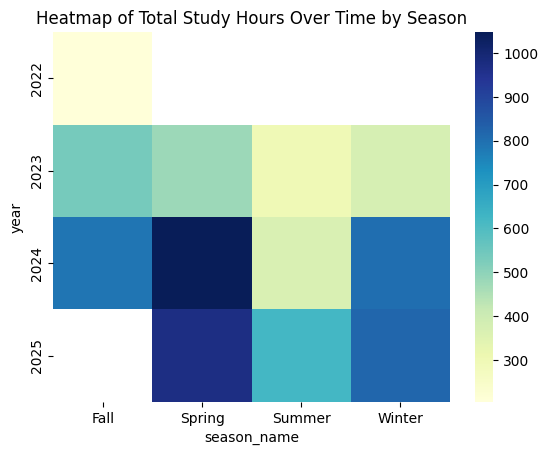

In [17]:
pivot_table = clean_study.pivot_table(index='year', columns='season_name', values='total', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Total Study Hours Over Time by Season')
plt.show()

## Heatmap of Study Hours By Weekday Compare to Week Numbers

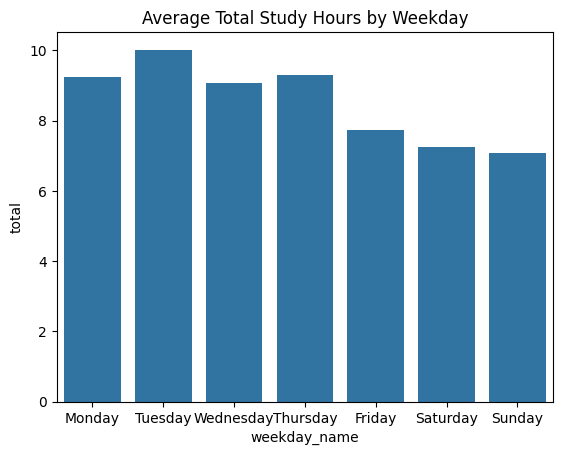

In [18]:
weekday_avg = clean_study.groupby('weekday')['total'].mean().reset_index()
weekday_avg['weekday_name'] = weekday_avg['weekday'].apply(lambda x: calendar.day_name[x])

sns.barplot(data=weekday_avg, x='weekday_name', y='total')
plt.title('Average Total Study Hours by Weekday')
plt.show()

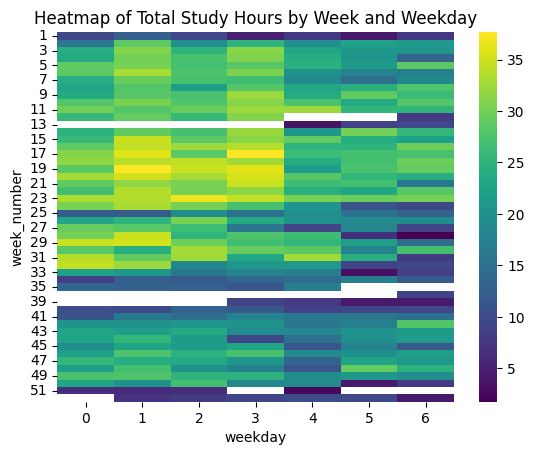

In [19]:
pivot_weekday = clean_study.pivot_table(index='week_number', columns='weekday', values='total', aggfunc='sum')

sns.heatmap(pivot_weekday, cmap='viridis')
plt.title('Heatmap of Total Study Hours by Week and Weekday')
plt.show()

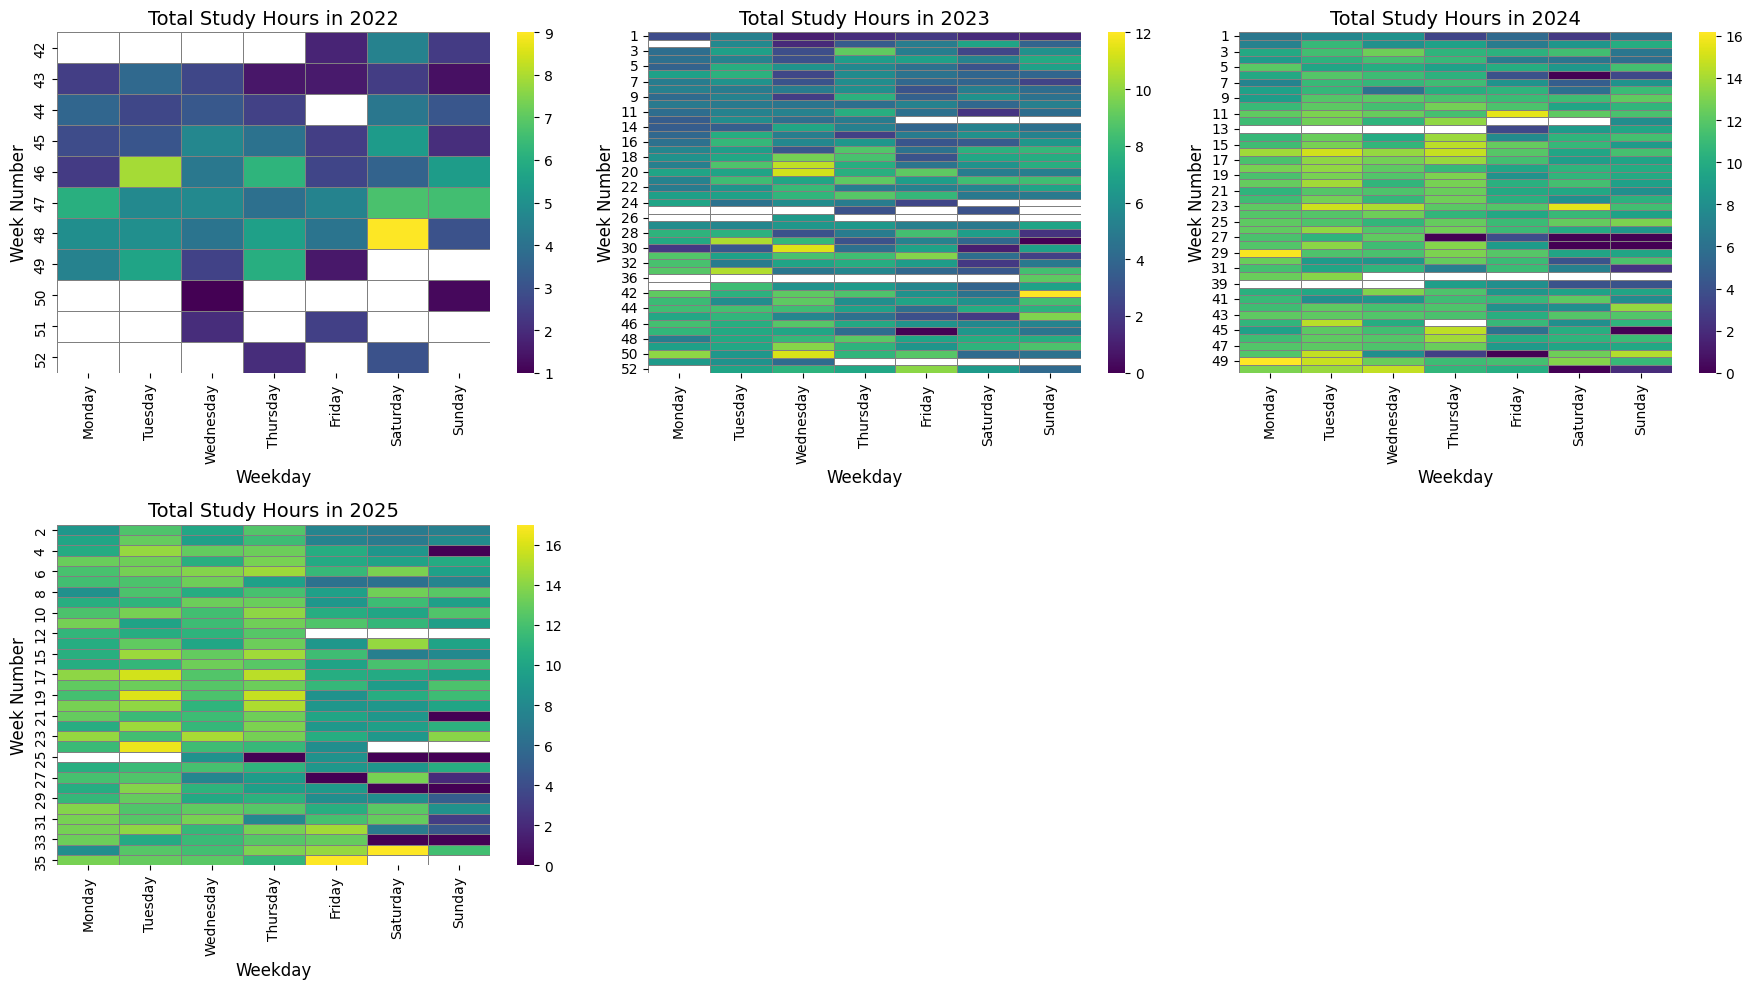

In [33]:
def plot_yearly_heatmaps(df, years, cols=3, cmap='viridis'):
    '''Plot heatmap per year'''
    
    num_years = len(years)
    rows = (num_years + cols - 1) // cols  # ceiling division
    
    plt.figure(figsize=(cols * 6, rows * 5))
    
    for idx, year in enumerate(years):
        plt.subplot(rows, cols, idx + 1)
        
        df_year = df[df['year'] == year]
        
        # pivot table: index=week_number, columns=weekday, values=total
        pivot_weekday = df_year.pivot_table(
            index='week_number',
            columns='weekday',
            values='total',
            aggfunc='sum'
        )
        
        # map numerical weekdays to names
        pivot_weekday.columns = [calendar.day_name[int(day)] for day in pivot_weekday.columns]
        
        # make sure that weekdays are ordered correctly
        ordered_weekdays = list(calendar.day_name)
        pivot_weekday = pivot_weekday.reindex(columns=ordered_weekdays)
        
        sns.heatmap(pivot_weekday, cmap=cmap, linewidths=.5, linecolor='gray', cbar=True)
        
        plt.title(f'Total Study Hours in {year}', fontsize=14)
        plt.xlabel('Weekday', fontsize=12)
        plt.ylabel('Week Number', fontsize=12)
    
    plt.tight_layout()
    plt.show()


years = sorted(clean_study['year'].unique())
plot_yearly_heatmaps(clean_study, years, cols=3, cmap='viridis')

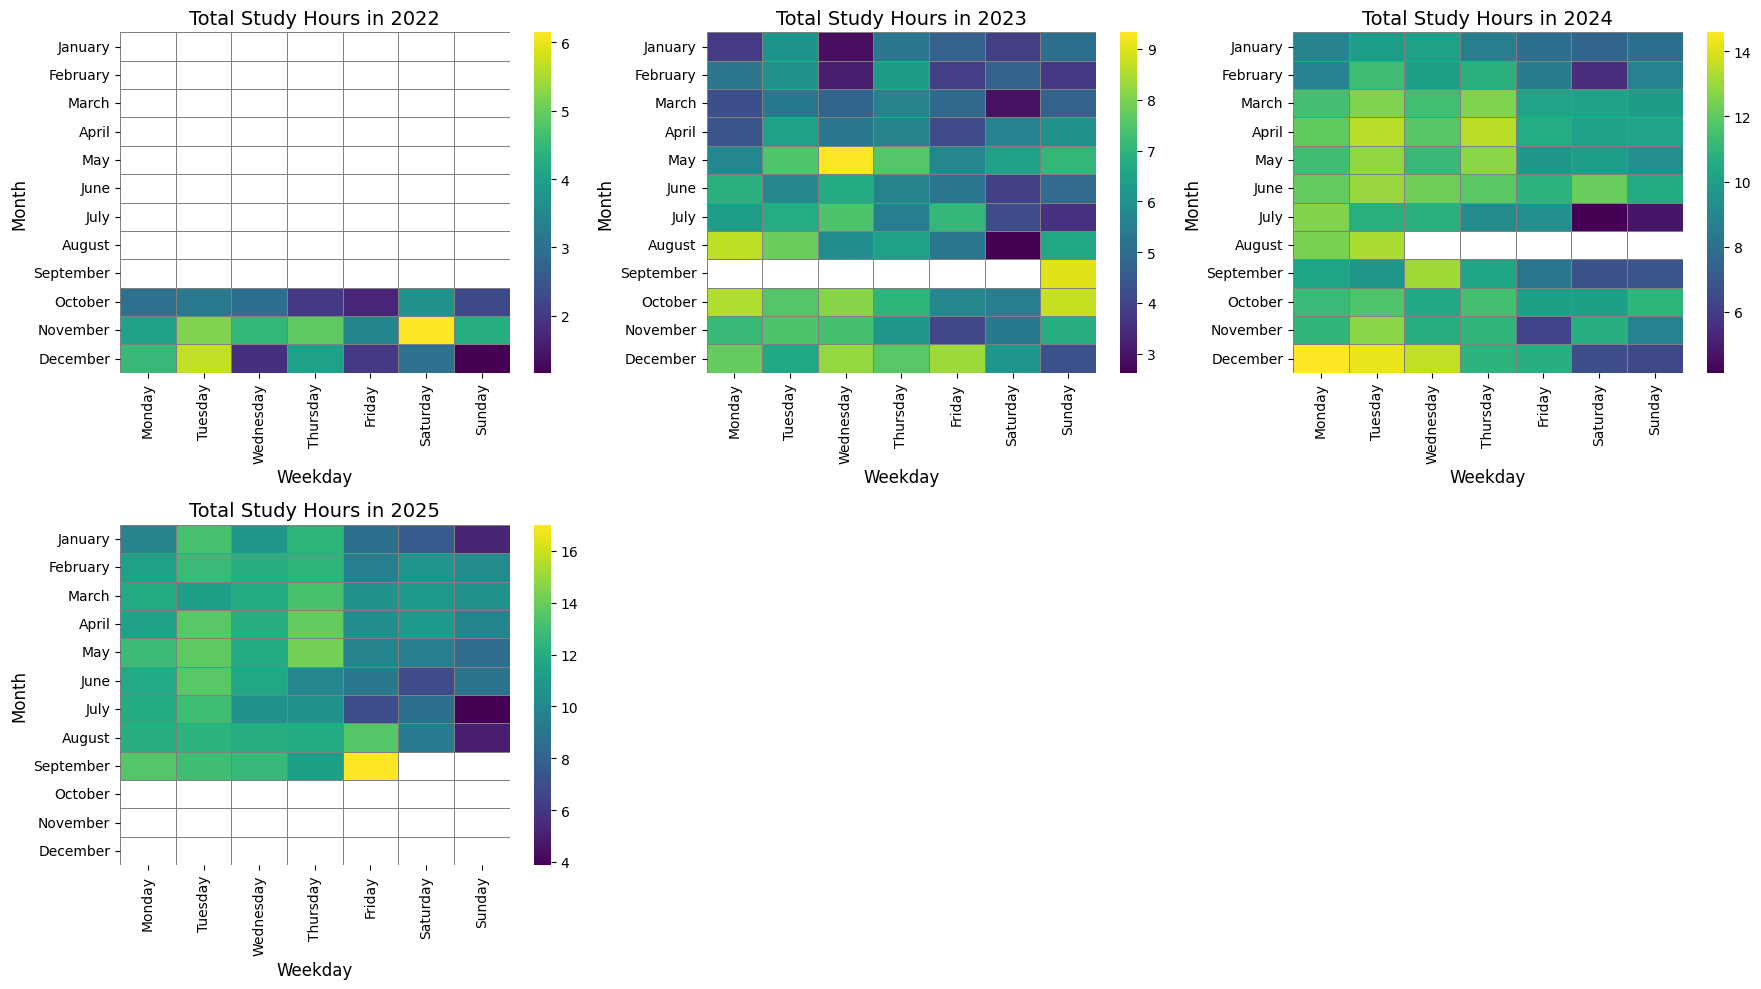

In [36]:
def plot_yearly_heatmaps(df, years, cols=3, cmap='viridis'):
    '''Plot heatmap per year'''
    
    num_years = len(years)
    rows = (num_years + cols - 1) // cols  # ceiling division
    
    plt.figure(figsize=(cols * 6, rows * 5))
    
    for idx, year in enumerate(years):
        plt.subplot(rows, cols, idx + 1)
        
        df_year = df[df['year'] == year].copy()
        
        # Create a mapping from week_number → month name
        df_year['week_start'] = pd.to_datetime(df_year['year'].astype(str) + df_year['week_number'].astype(str) + '1',
                                               format='%Y%W%w', errors='coerce')
        df_year['month_name'] = df_year['week_start'].dt.strftime('%B')
        
        # Pivot: index=month_name, columns=weekday, values=total
        pivot_weekday = df_year.pivot_table(
            index='month_name',
            columns='weekday',
            values='total',
            aggfunc='mean'
        )
        
        # map numerical weekdays to names
        pivot_weekday.columns = [calendar.day_name[int(day)] for day in pivot_weekday.columns]
        
        # make sure that weekdays are ordered correctly
        ordered_weekdays = list(calendar.day_name)
        pivot_weekday = pivot_weekday.reindex(columns=ordered_weekdays)
        
        # order months properly (Jan → Dec)
        ordered_months = list(calendar.month_name)[1:]  # skip empty first entry
        pivot_weekday = pivot_weekday.reindex(index=ordered_months)
        
        sns.heatmap(pivot_weekday, cmap=cmap, linewidths=.5, linecolor='gray', cbar=True)
        
        plt.title(f'Total Study Hours in {year}', fontsize=14)
        plt.xlabel('Weekday', fontsize=12)
        plt.ylabel('Month', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
years = sorted(clean_study['year'].unique())
plot_yearly_heatmaps(clean_study, years, cols=3, cmap='viridis')

## Rolling Window of 30 Days Trend Over the Years

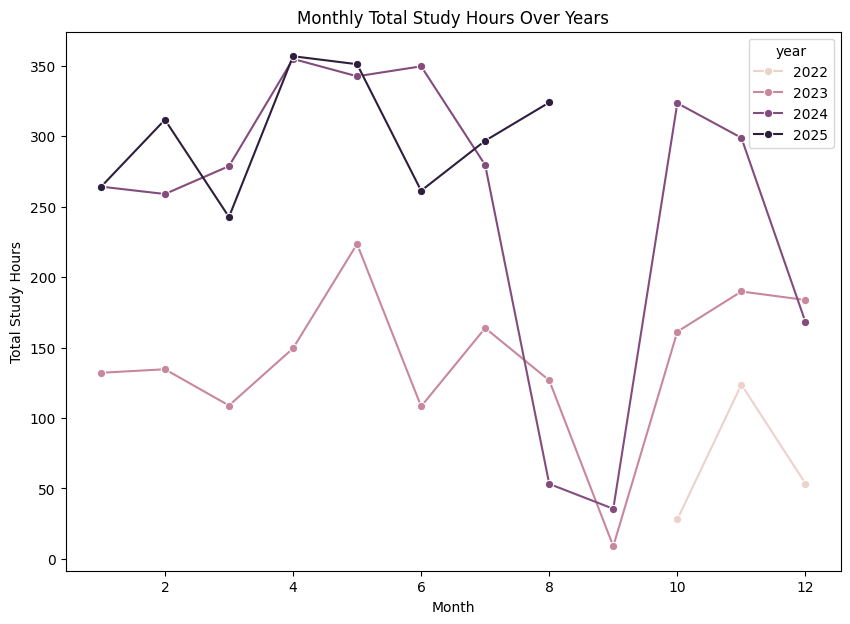

In [30]:
monthly_total = clean_study.groupby(['year', 'month'])['total'].sum().reset_index()
monthly_total['month_name'] = monthly_total['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 7))
sns.lineplot(data=monthly_total, x='month', y='total', hue='year', marker='o')
plt.title('Monthly Total Study Hours Over Years')
plt.xlabel('Month')
plt.ylabel('Total Study Hours')
plt.show()

## Checking Exam's Effects

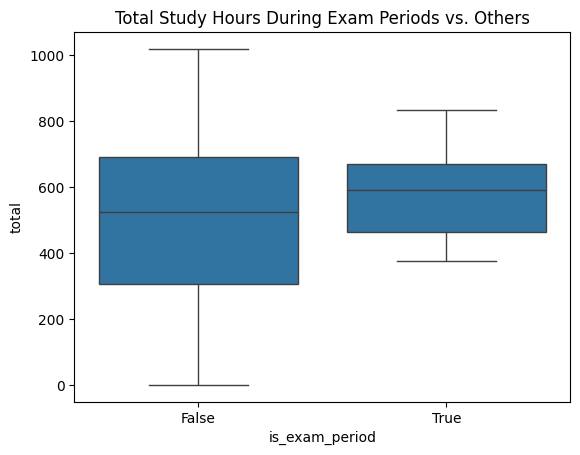

In [22]:
exam_periods = [
    ('2023-12-01', '2023-12-15'),
    ('2024-05-01', '2024-05-15'),
    
]

study['is_exam_period'] = False
for start, end in exam_periods:
    study.loc[(study['date'] >= start) & (study['date'] <= end), 'is_exam_period'] = True

# Compare study hours during exam periods
sns.boxplot(data=study, x='is_exam_period', y='total')
plt.title('Total Study Hours During Exam Periods vs. Others')
plt.show()

# Dimensionality Reduction

| **Technique**       | **Type**      | **Supervised** | **Preserves Local Structure** | **Preserves Global Structure** | **Best For**                                      |
|:--------------------|:-------------:|:---------------:|:------------------------------:|:--------------------------------:|:-------------------------------------------------|
| **PCA**             | Linear        | No              | Moderate                      | High                             | Data compression, noise reduction                |
| **t-SNE**           | Non-Linear    | No              | High                          | Low                              | Visualization of clusters                        |
| **UMAP**            | Non-Linear    | No              | High                          | Moderate to High                 | Visualization, preserving more structure         |
| **LDA**             | Linear        | Yes             | Moderate                      | High                             | Classification, maximizing class separation      |
| **Factor Analysis** | Linear        | No              | Low                           | Moderate                         | Identifying latent factors                       |
| **NMF**             | Linear        | No              | Moderate                      | Low                              | Parts-based representation, interpretability      |
| **ICA**             | Linear        | No              | High                          | Low                              | Signal separation, feature extraction            |
| **Autoencoders**    | Non-Linear    | No              | High                          | High                             | Complex data representations, anomaly detection   |
| **Kernel PCA**      | Non-Linear    | No              | Moderate to High              | Moderate                         | Non-linear data structures                       |


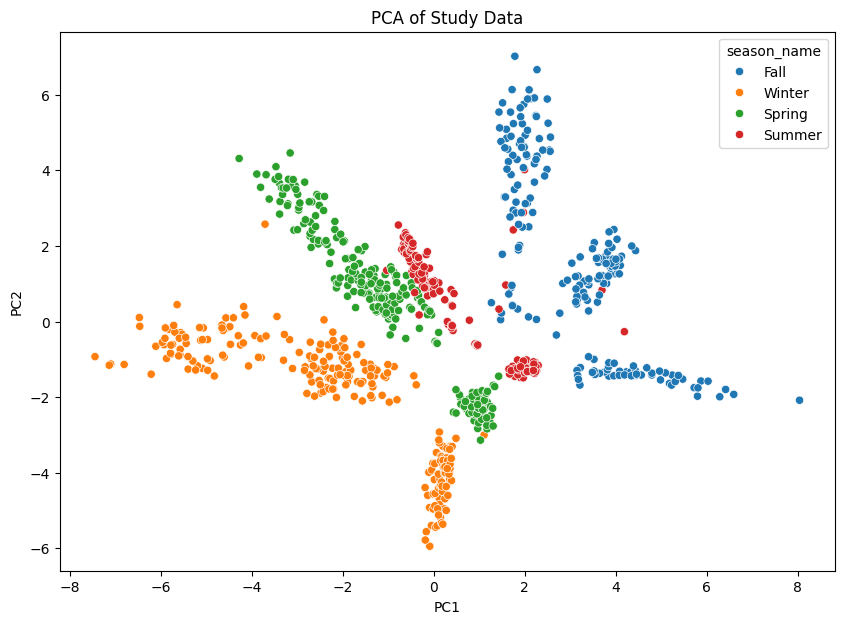

[0.05631757 0.04698445]


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_cols = clean_study.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_study[numerical_cols])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
clean_study['PC1'] = principal_components[:, 0]
clean_study['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=clean_study, x='PC1', y='PC2', hue='season_name')
plt.title('PCA of Study Data')
plt.show()

print(pca.explained_variance_ratio_)

Explained Variance Ratio: [0.05631757 0.04698444 0.03813509]
Total Explained Variance: 0.1414371062869018


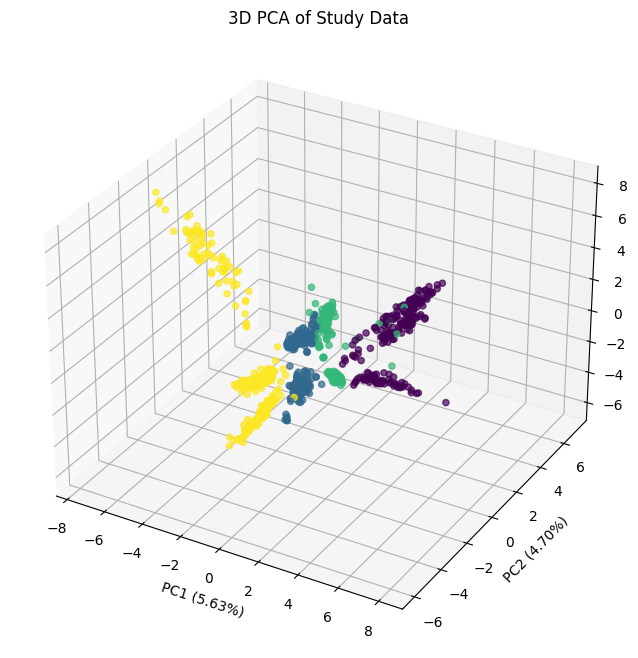

In [24]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

clean_study['PC1'] = principal_components[:, 0]
clean_study['PC2'] = principal_components[:, 1]
clean_study['PC3'] = principal_components[:, 2]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    clean_study['PC1'],
    clean_study['PC2'],
    clean_study['PC3'],
    c=clean_study['season_name'].astype('category').cat.codes,  # Convert categories to numeric codes for coloring
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D PCA of Study Data')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Seasons", loc="upper right", bbox_to_anchor=(1.15, 1))
ax.add_artist(legend1)

plt.show()

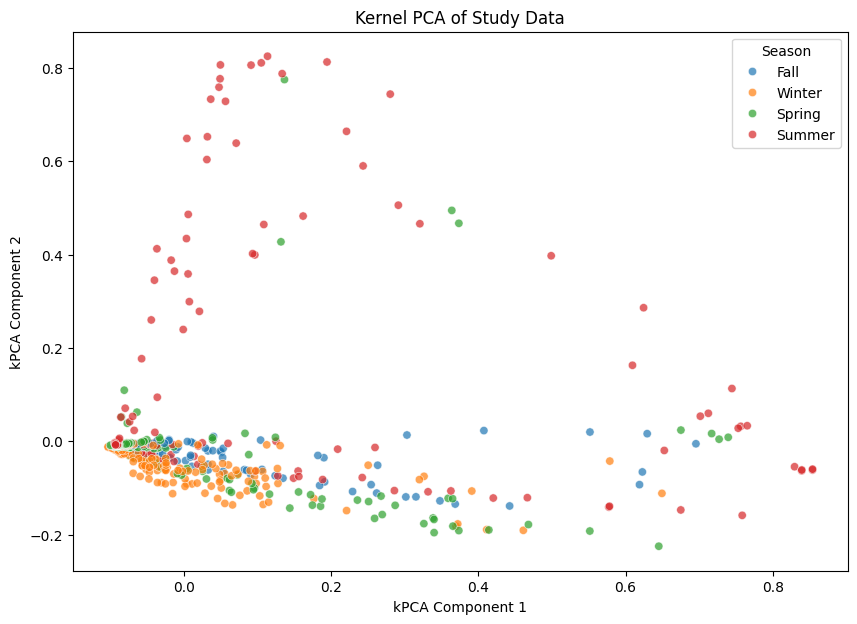

In [25]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, random_state=42)
kpca_results = kpca.fit_transform(scaled_data)

clean_study['kPCA1'] = kpca_results[:, 0]
clean_study['kPCA2'] = kpca_results[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='kPCA1', y='kPCA2',
    hue='season_name',
    data=clean_study,
    legend='full',
    alpha=0.7
)
plt.title('Kernel PCA of Study Data')
plt.xlabel('kPCA Component 1')
plt.ylabel('kPCA Component 2')
plt.legend(title='Season')
plt.show()


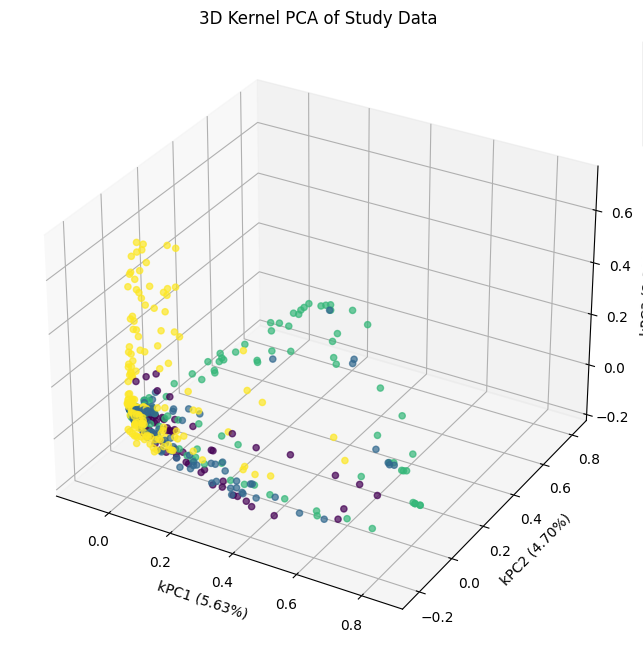

In [26]:
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.04, random_state=42)
kpca_results = kpca.fit_transform(scaled_data)

clean_study['kPCA1'] = kpca_results[:, 0]
clean_study['kPCA2'] = kpca_results[:, 1]
clean_study['kPCA3'] = kpca_results[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    clean_study['kPCA1'],
    clean_study['kPCA2'],
    clean_study['kPCA3'],
    c=clean_study['season_name'].astype('category').cat.codes,  # Convert categories to numeric codes for coloring
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel(f'kPC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'kPC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'kPC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D Kernel PCA of Study Data')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Seasons", loc="upper right", bbox_to_anchor=(1.15, 1))
ax.add_artist(legend1)

plt.show()

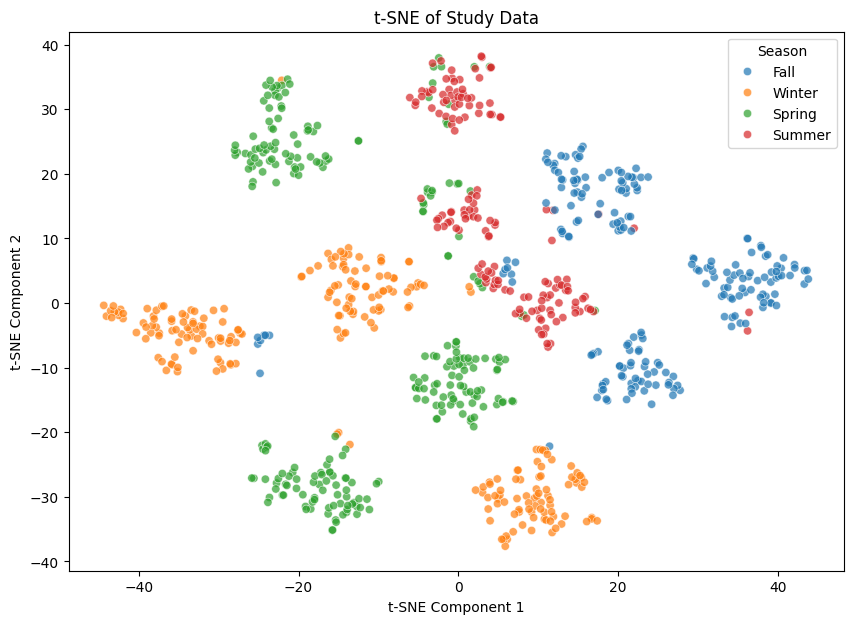

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_data)

clean_study['tSNE1'] = tsne_results[:, 0]
clean_study['tSNE2'] = tsne_results[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tSNE1', y='tSNE2',
    hue='season_name',
    data=clean_study,
    legend='full',
    alpha=0.7
)
plt.title('t-SNE of Study Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Season')
plt.show()

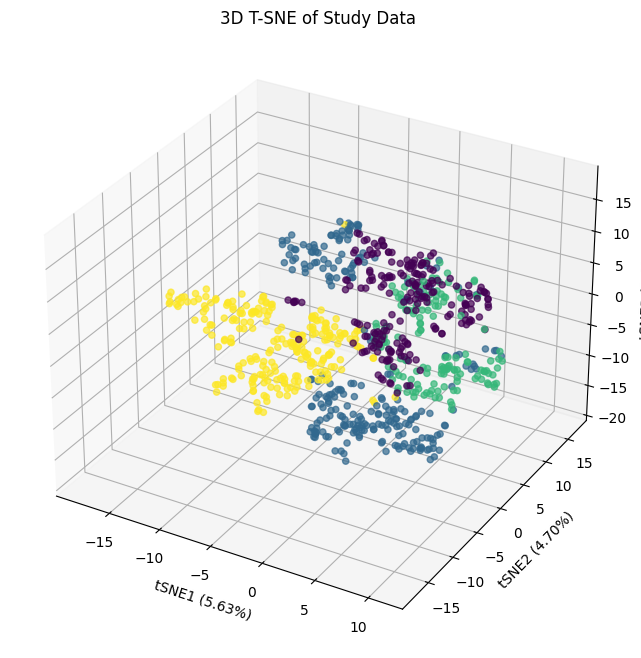

In [28]:
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_data)

clean_study['tSNE1'] = tsne_results[:, 0]
clean_study['tSNE2'] = tsne_results[:, 1]
clean_study['tSNE3'] = tsne_results[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    clean_study['tSNE1'],
    clean_study['tSNE2'],
    clean_study['tSNE3'],
    c=clean_study['season_name'].astype('category').cat.codes,  # Convert categories to numeric codes for coloring
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel(f'tSNE1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'tSNE2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'tSNE3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
ax.set_title('3D T-SNE of Study Data')

legend1 = ax.legend(*scatter.legend_elements(),
                    title="Seasons", loc="upper right", bbox_to_anchor=(1.15, 1))
ax.add_artist(legend1)

plt.show()

/Users/kevinb/miniforge3/envs/ucsd_study/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/Users/kevinb/miniforge3/envs/ucsd_study/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


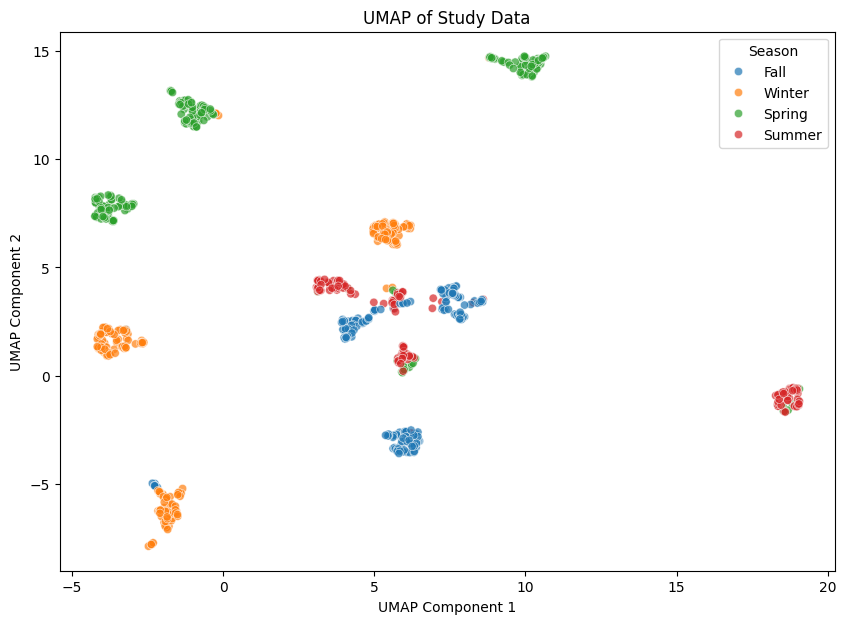

In [29]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
umap_results = umap_reducer.fit_transform(scaled_data)

clean_study['UMAP1'] = umap_results[:, 0]
clean_study['UMAP2'] = umap_results[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='season_name',
    data=clean_study,
    legend='full',
    alpha=0.7
)
plt.title('UMAP of Study Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Season')
plt.show()

---
---